# :computer: Check Database

In [2]:
import sqlalchemy 
import pandas as pd
import pathlib
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
db_path=pathlib.Path.cwd() / "bourbon/buffalo_trace.db"
db_path.exists()

True

In [4]:
engine = sqlalchemy.create_engine(f"sqlite:///{db_path.absolute()}")
# test connection 
with engine.connect() as conn: 
    with conn.begin(): 
        ver_no = conn.execute(sqlalchemy.text("SELECT SQLITE_VERSION()" )).fetchone()[0]
        print(f"Connected at SQLite V{ver_no}")

Connected at SQLite V3.35.5


In [5]:
inspect = sqlalchemy.inspect(engine)
inspect.get_table_names()

['buffalo_trace', 'product_avail', 'product_ext']

In [6]:
with engine.connect() as conn: 
    with conn.begin(): 
        sub_bourbon = pd.read_sql("select product_title, product_avail, product_update_time from buffalo_trace", engine)
 

# bourbon_data[["product_title","product_avail"]].plot(kind='line', legend=True)
print(f"duplicates: {len(sub_bourbon.index) - len((sub_bourbon.drop_duplicates()).index)}")
sub_bourbon[sub_bourbon.duplicated()]

duplicates: 1750


,product_title,product_avail,product_update_time
16,Buffalo Trace,1,2023-08-14 14:22:00.000000
17,W.L. Weller Special Reserve,0,2023-08-14 14:22:00.000000
18,E.H. Taylor Jr. Small Batch,0,2023-08-14 14:22:00.000000
19,Eagle Rare,0,2023-08-14 14:22:00.000000
20,Blanton’s Single Barrel,0,2023-08-14 14:22:00.000000
...,...,...,...
1850,Eagle Rare,1,2023-08-21 08:22:00.000000
1851,Blanton’s Single Barrel,0,2023-08-21 08:22:00.000000
1852,Sazerac Rye,1,2023-08-21 08:22:00.000000
1853,Wheatley,1,2023-08-21 08:22:00.000000


In [7]:
de_duped = sub_bourbon.drop_duplicates()

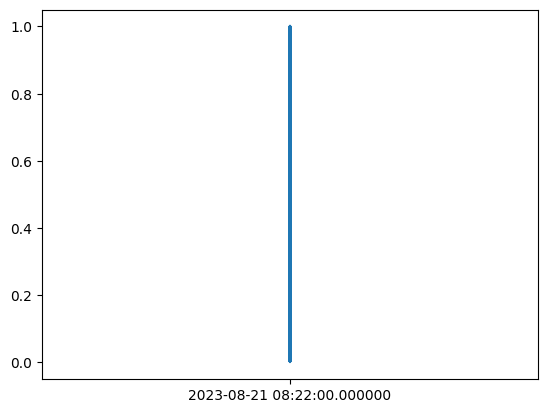

In [8]:
bourbon_data = pd.read_sql("select * FROM buffalo_trace", engine)
today_bourbon = bourbon_data\
    .loc[pd.to_datetime(bourbon_data['product_update_time']).dt.date == dt.date.today() ,:]\
        .reset_index(drop=True)

plt.plot(today_bourbon["product_update_time"],today_bourbon["product_avail"])

## Clean Duplicates

In [13]:
# clean dupes
print(f"deduped : {len(bourbon_data.drop_duplicates().index)}")
print(f"deduped : {len(bourbon_data.drop_duplicates(subset=['product_title','product_avail','product_update_time']).index)}")
print(f"normal : {len(bourbon_data.index)}")

deduped : 1855
deduped : 105
normal : 1855


In [18]:
de_duped = bourbon_data\
    .drop_duplicates(subset=[
        'product_title',
        'product_avail',
        'product_update_time'
    ]).reset_index(drop=True)

de_duped.to_sql(name='buffalo_trace', con=engine, if_exists='replace')

105